In [1]:
#dependancies

import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# create a list of latitudes and Longitudes and zip them
lat=np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lat,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [5]:

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)# Starting URL for Weather Map API Call.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f7bba6b947a10f675ca07abc8c3dcb3


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | burica
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | basco
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | anjiang
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | litovko
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | pereslavl-zalesskiy
Processing Record 16 of Set 1 | olenegorsk
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | waipawa
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | bonthe
Processing Record 21 of Set 1 | ouadda
Processing Record 22 of Set 1 | bairiki
Processing Record 23 of Set 1 | ushuaia
Processing Re

Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | strezhevoy
Processing Record 41 of Set 4 | hofn
Processing Record 42 of Set 4 | lorengau
Processing Record 43 of Set 4 | baker city
Processing Record 44 of Set 4 | nampula
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | plattsburgh
Processing Record 47 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | lac du bonnet
Processing Record 50 of Set 4 | san jose
Processing Record 1 of Set 5 | lasa
Processing Record 2 of Set 5 | bardiyah
Processing Record 3 of Set 5 | ust-ilimsk
Processing Record 4 of Set 5 | kaeo
Processing Record 5 of Set 5 | waggaman
Processing Record 6 of Set 5 | qasigiannguit
Processing Record 7 of Set 5 | goderich
Processing Record 8 of Set 5 | ye
City not found. Skipping...
Processing Record 9 of Set 5 | adelaide
Processing Record 10 of Set 5 | tessalit
Processing Re

Processing Record 31 of Set 8 | cockburn town
Processing Record 32 of Set 8 | portland
Processing Record 33 of Set 8 | raipur
Processing Record 34 of Set 8 | lethem
Processing Record 35 of Set 8 | rafaela
Processing Record 36 of Set 8 | koidu
Processing Record 37 of Set 8 | sherbakul
Processing Record 38 of Set 8 | la possession
Processing Record 39 of Set 8 | antalaha
Processing Record 40 of Set 8 | asau
Processing Record 41 of Set 8 | ambilobe
Processing Record 42 of Set 8 | farah
Processing Record 43 of Set 8 | sorvag
City not found. Skipping...
Processing Record 44 of Set 8 | miyako
Processing Record 45 of Set 8 | sinjar
Processing Record 46 of Set 8 | vihti
Processing Record 47 of Set 8 | contamana
Processing Record 48 of Set 8 | tuatapere
Processing Record 49 of Set 8 | coihaique
Processing Record 50 of Set 8 | catuday
Processing Record 1 of Set 9 | ayan
Processing Record 2 of Set 9 | hof
Processing Record 3 of Set 9 | konstantinovka
Processing Record 4 of Set 9 | luganville
Proc

Processing Record 20 of Set 12 | banning
Processing Record 21 of Set 12 | porto novo
Processing Record 22 of Set 12 | thinadhoo
Processing Record 23 of Set 12 | abha
Processing Record 24 of Set 12 | verkhnyaya inta
Processing Record 25 of Set 12 | ouallam
Processing Record 26 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 27 of Set 12 | zabol
Processing Record 28 of Set 12 | kadom
Processing Record 29 of Set 12 | kodiak
Processing Record 30 of Set 12 | gizo
Processing Record 31 of Set 12 | batticaloa
Processing Record 32 of Set 12 | toora-khem
Processing Record 33 of Set 12 | camalu
Processing Record 34 of Set 12 | rafraf
Processing Record 35 of Set 12 | faya
Processing Record 36 of Set 12 | nouakchott
Processing Record 37 of Set 12 | sisophon
Processing Record 38 of Set 12 | sorong
Processing Record 39 of Set 12 | katherine
Processing Record 40 of Set 12 | tabora
Processing Record 41 of Set 12 | muli
Processing Record 42 of Set 12 | ishigaki
Processing Record 43 o

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,57.63,77,0,15.90,CL,2021-01-15 23:49:46
1,Atuona,-9.8000,-139.0333,77.56,77,13,12.35,PF,2021-01-15 23:49:46
2,Cape Town,-33.9258,18.4232,66.99,88,20,8.05,ZA,2021-01-15 23:49:46
3,Rikitea,-23.1203,-134.9692,79.57,66,16,8.19,PF,2021-01-15 23:49:46
4,Basco,20.4487,121.9702,73.49,79,25,28.12,PH,2021-01-15 23:49:46


In [9]:
city_data_df=city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2021-01-15 23:49:46,-37.6167,-73.6500,57.63,77,0,15.90
1,Atuona,PF,2021-01-15 23:49:46,-9.8000,-139.0333,77.56,77,13,12.35
2,Cape Town,ZA,2021-01-15 23:49:46,-33.9258,18.4232,66.99,88,20,8.05
3,Rikitea,PF,2021-01-15 23:49:46,-23.1203,-134.9692,79.57,66,16,8.19
4,Basco,PH,2021-01-15 23:49:46,20.4487,121.9702,73.49,79,25,28.12


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

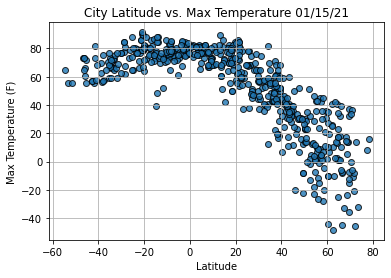

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

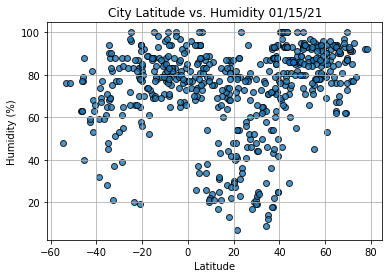

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

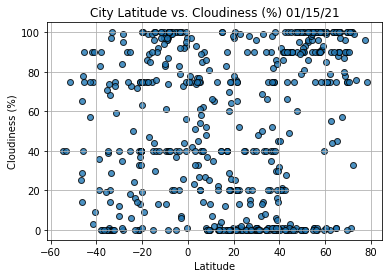

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

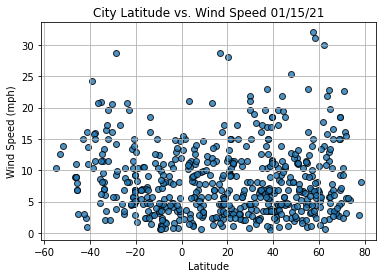

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [18]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        561 non-null    object 
 1   Country     561 non-null    object 
 2   Date        561 non-null    object 
 3   Lat         561 non-null    float64
 4   Lng         561 non-null    float64
 5   Max Temp    561 non-null    float64
 6   Humidity    561 non-null    int64  
 7   Cloudiness  561 non-null    int64  
 8   Wind Speed  561 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 39.6+ KB


In [19]:

index13=city_data_df.loc[13]
index13

City                   Olenegorsk
Country                        RU
Date          2021-01-15 23:49:47
Lat                         68.15
Lng                          33.3
Max Temp                    17.69
Humidity                       97
Cloudiness                     87
Wind Speed                   2.84
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [21]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2021-01-15 23:49:46,-37.6167,-73.6500,57.63,77,0,15.90
1,Atuona,PF,2021-01-15 23:49:46,-9.8000,-139.0333,77.56,77,13,12.35
2,Cape Town,ZA,2021-01-15 23:49:46,-33.9258,18.4232,66.99,88,20,8.05
3,Rikitea,PF,2021-01-15 23:49:46,-23.1203,-134.9692,79.57,66,16,8.19
8,Bredasdorp,ZA,2021-01-15 23:49:47,-34.5322,20.0403,66.20,68,0,11.50


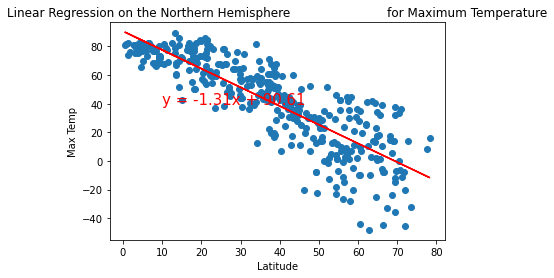

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

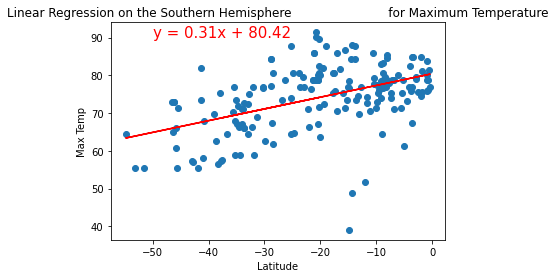

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

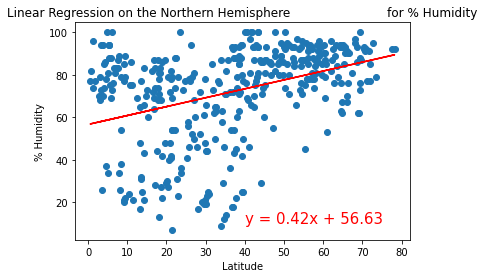

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

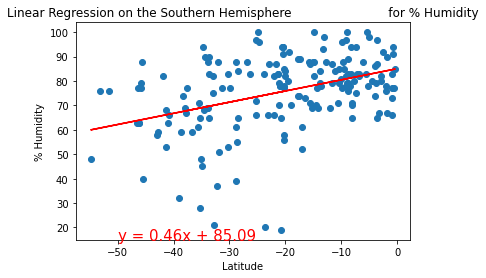

In [25]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

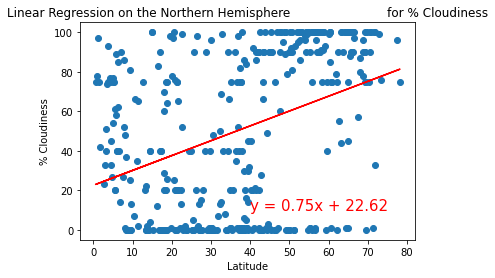

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

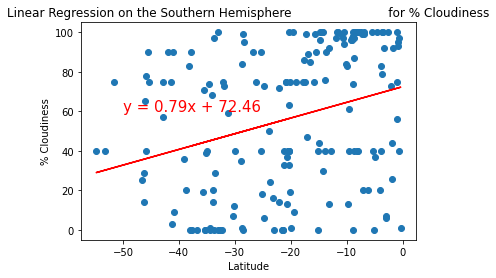

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

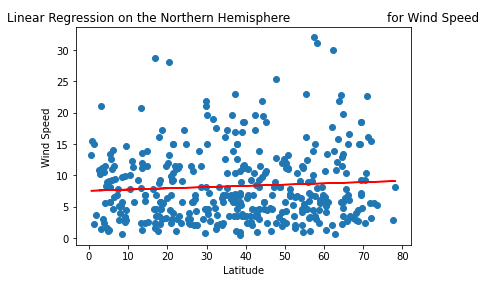

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

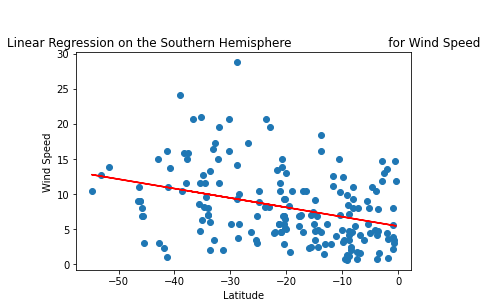

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))